In [1]:
import pandas as pd # Библиотека Pandas для работы с табличными данными
from google.colab import files  # чтобы загружать файлы в облако через проводник 

import numpy as np # библиотека Numpy для операций линейной алгебры и прочего
import matplotlib.pyplot as plt # библиотека MatPlotLib для визуализации
import seaborn as sns; sns.set() # библиотека Seaborn для визуализации данных из Pandas
import json

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
uploaded = files.upload() #просто запускаем и выбираем файл в проводнике

Saving CleanSubmissionsWithForms.json to CleanSubmissionsWithForms.json


In [4]:
df = pd.read_json('/content/CleanSubmissionsWithForms.json')

In [5]:
df

,id,SubmissionLikes,Category,Description,Participation,Money,Age,ContactName,LiveTime,FeatureType,GeometryType,CoordinatesLongitude,CoordinatesLatitude,CreatedAt
0,7,67,"Общественные пространства, природа и экология","Благоустроить Силинский лес: освещение, дорожк...",Нет,Пока не знаю,40-65,Лариса,С рождения,Feature,Point,0.000000,0.000000,2023-03-06T09:38:48.587Z
1,8,61,"Общественные пространства, природа и экология",Благоустроить Силинский лес,Нет,Пока не знаю,40-65,Лариса,С рождения,Feature,Point,137.041787,50.572570,2023-03-06T09:40:23.085Z
2,9,109,Дороги и транспорт,Здание автовокзала требует колоссальной реконс...,Нет,Бюджетные,25-40,Олег,Более 5 лет,Feature,Point,137.031797,50.533640,2023-03-06T09:54:31.566Z
3,10,44,"Общественные пространства, природа и экология","Ремонтируют парк очень плохо, страшно коляской...",Нет,Бюджетные,До 25,ОльгаЛ,С рождения,Feature,Point,137.026578,50.543906,2023-03-06T10:07:14.739Z
4,11,185,"Здоровье, образование, спорт и культура",Реконструкция ДК Судостроитель,Нет,Бюджетные,25-40,Александра,"Жил, но уехал",Feature,Point,137.022575,50.542521,2023-03-15T07:08:22.533Z
5,12,116,"Общественные пространства, природа и экология",привести в современное состояние парки города...,Да,Пока не знаю,40-65,Елена,С рождения,Feature,Point,0.000000,0.000000,2023-03-15T07:23:58.030Z
6,13,123,Дороги и транспорт,Возрождение муниципального транспорта-автобусы...,Нет,Бюджетные,40-65,СЕРГЕЙ,Более 5 лет,Feature,Point,0.000000,0.000000,2023-03-15T07:27:43.646Z
7,14,152,Дороги и транспорт,Восстановить нормальную работу Комсомольского ...,Нет,Бюджетные,40-65,Елена,С рождения,Feature,Point,136.935375,50.406823,2023-03-15T07:38:16.299Z
8,15,101,"Здоровье, образование, спорт и культура",Предлагаю провести реконструкцию одной из глав...,Нет,Бюджетные,25-40,Сергей,С рождения,Feature,Point,0.000000,0.000000,2023-03-15T08:08:30.840Z
9,16,137,Дороги и транспорт,"Учитывая, что у нас в городе с очисткой дорог...",Да,Бюджетные,40-65,Игорь,Более 5 лет,Feature,Point,0.000000,0.000000,2023-03-16T00:29:34.708Z


In [6]:
df.shape

(145, 14)

In [7]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
import nltk
from transformers import pipeline

# Download the necessary NLTK packages
nltk.download('punkt')
nltk.download('stopwords')

# Load the pre-trained sentiment analysis model
MODEL = pipeline('sentiment-analysis', model='nlptown/bert-base-multilingual-uncased-sentiment')

# Analyze a Russian comment
# comment = "Замечательный фильм! Очень трогательный и увлекательный!"
# result = model(comment)[0]
# print(f"Comment: {comment}\nSentiment: {result['label']} ({result['score']})")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
def calculate_happy(input):
    try:
        result = MODEL(input)[0]
    except Exception as e:
        # just put average if something goes wrong
        return 3
    return int(result['label'].split(' ')[0])

In [10]:
# example that everything works
calculate_happy("Замечательный фильм! Очень трогательный и увлекательный!")

5

In [11]:
df['Happy'] = df['Description'].apply(calculate_happy)

Token indices sequence length is longer than the specified maximum sequence length for this model (634 > 512). Running this sequence through the model will result in indexing errors


In [12]:
df['Happy'].value_counts()

5    50
4    49
1    23
2    17
3     6
Name: Happy, dtype: int64

In [13]:
import seaborn as sns

## How happy are the people in counts

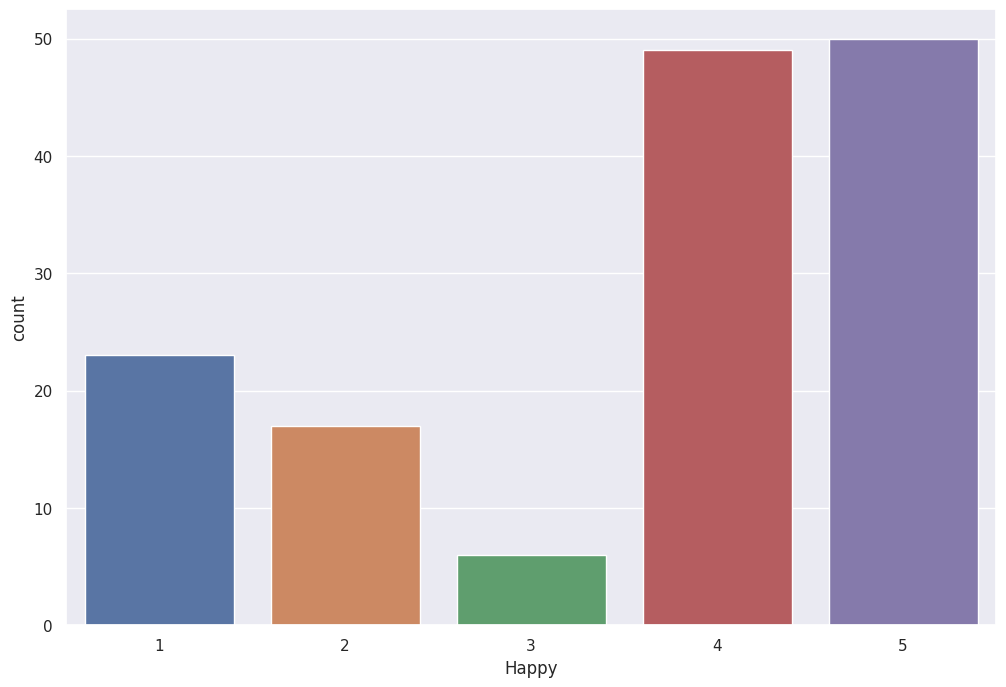

In [14]:
plt.figure(figsize=(12, 8))
sns.countplot(x='Happy', data=df)
plt.show()

## How happy are the people in percentages

In [15]:
percentile_happy_str = df.Happy.value_counts(normalize=True).mul(100).round(1).astype(str)+'%'
percentile_happy_int = df.Happy.value_counts(normalize=True).mul(100).round(1).astype(int)
display(percentile_happy_str)

5    34.5%
4    33.8%
1    15.9%
2    11.7%
3     4.1%
Name: Happy, dtype: object

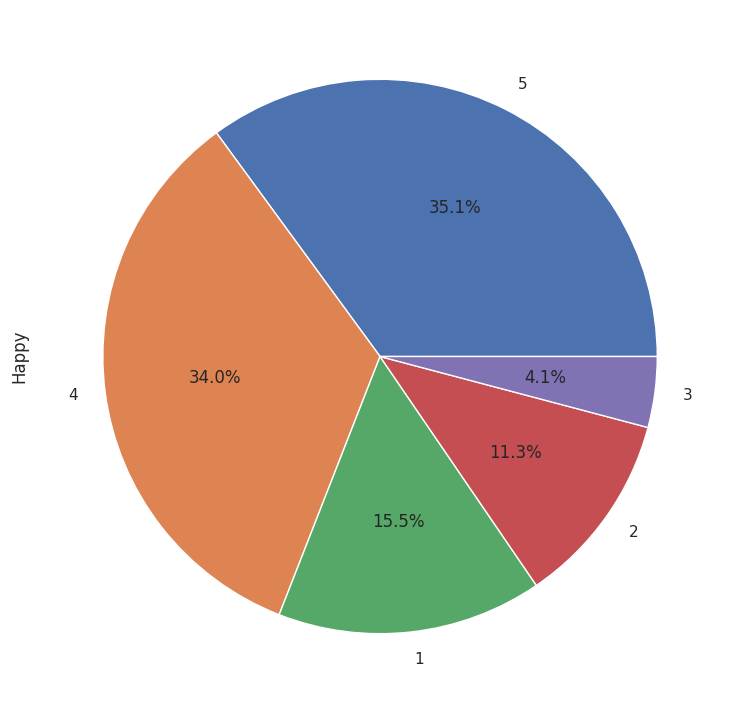

In [16]:
plt.figure(figsize=(15, 9))
percentile_happy_int.plot(kind='pie', autopct='%1.1f%%')
plt.show()

# **Satisfaction percentage is 71.86%**

In [17]:
# average satisfaction of the people is 3.59 about/proportional that is 71.8%
df['Happy'].mean() * 20

71.86206896551724

## Category *analysis*

In [36]:
df['Category'].value_counts().sort_values(ascending=False)

Общественные пространства, природа и экология    45
Дороги и транспорт                               34
Здоровье, образование, спорт и культура          26
Жилые дома и дворы                               19
Другое                                           16
Производство, торговля и услуги                   3
Инженерные системы города                         2
Name: Category, dtype: int64

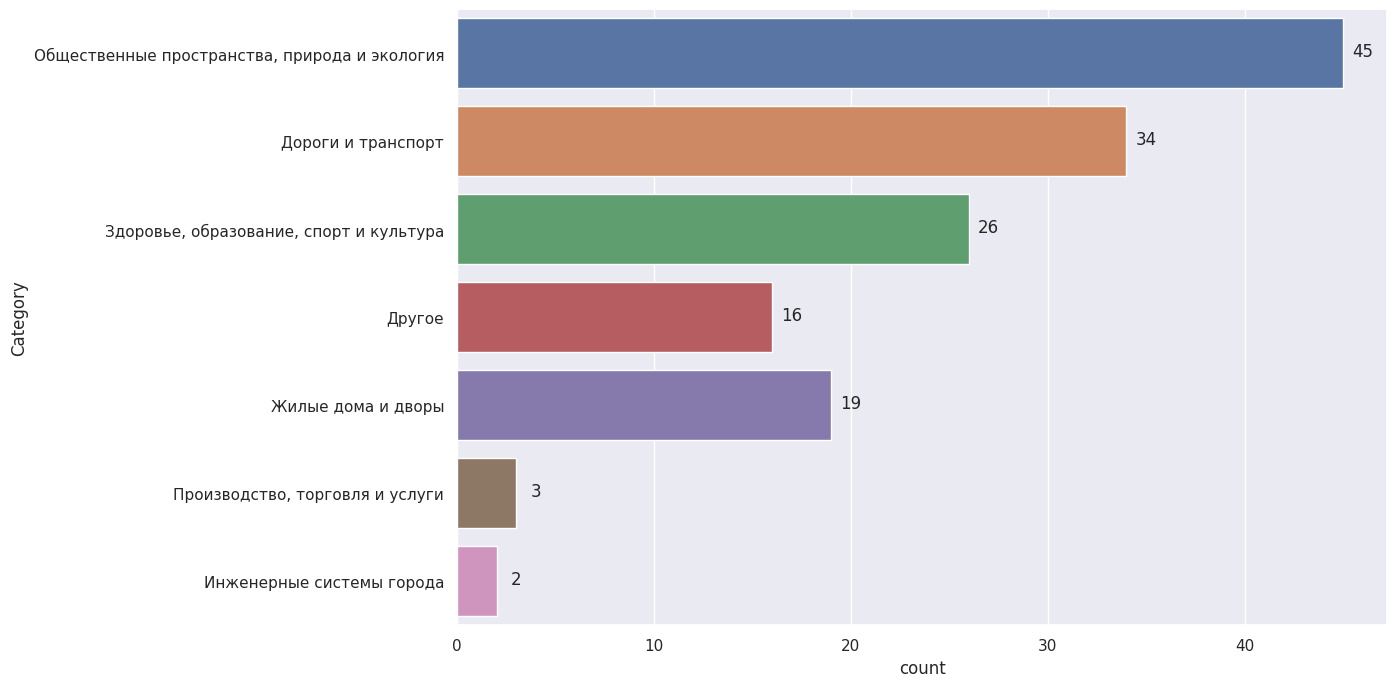

In [44]:
plt.figure(figsize=(12,8))
ax = sns.countplot(y="Category", data=df)
for p in ax.patches:
    ax.annotate(
        format(p.get_width(), '.0f'),
        (p.get_width() + 1, p.get_y() + p.get_height() / 1.5),
        ha = 'center',
        va = 'center',
        xytext = (0, 10),
        textcoords = 'offset points'
    )
plt.show()

In [20]:
percentile_category_str = df.Category.value_counts(normalize=True).mul(100).round(1).astype(str)+'%'
percentile_category_int = df.Category.value_counts(normalize=True).mul(100).round(1).astype(int)
display(percentile_category_str)

Общественные пространства, природа и экология    31.0%
Дороги и транспорт                               23.4%
Здоровье, образование, спорт и культура          17.9%
Жилые дома и дворы                               13.1%
Другое                                           11.0%
Производство, торговля и услуги                   2.1%
Инженерные системы города                         1.4%
Name: Category, dtype: object

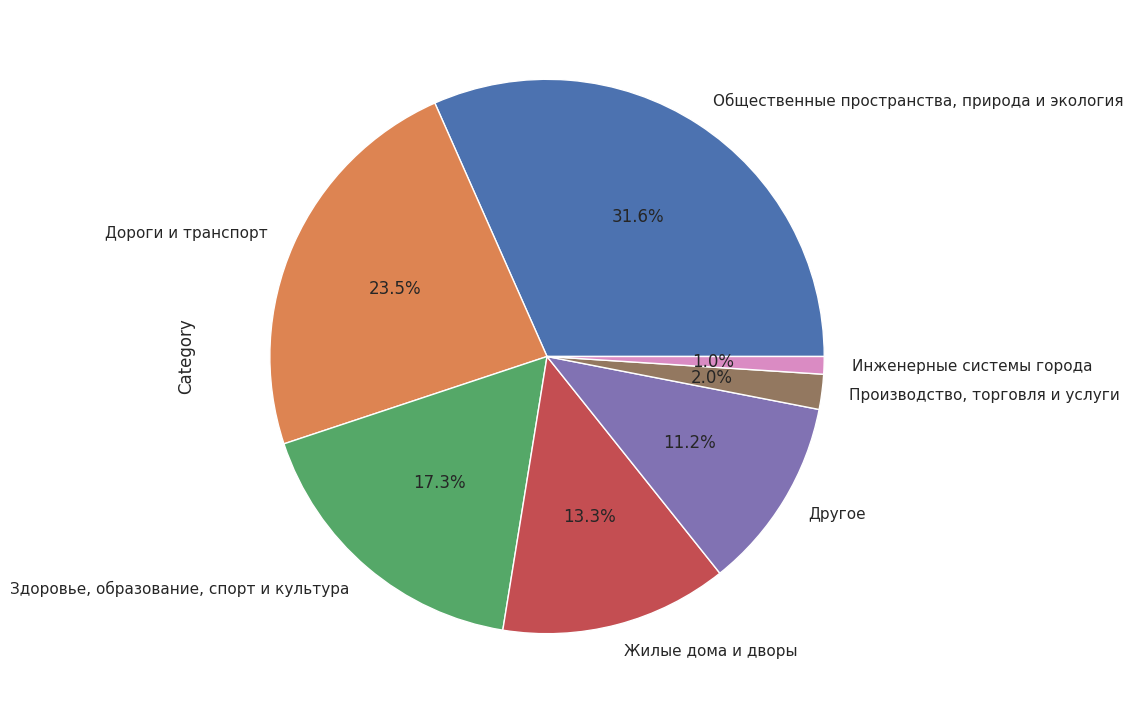

In [21]:
plt.figure(figsize=(15, 9))
percentile_category_int.plot(kind='pie', autopct='%1.1f%%')
plt.show()

### 10 Most relevant comments

In [22]:
ten_most_popular = df.nlargest(10, 'SubmissionLikes')

In [23]:
ten_most_popular.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 4 to 8
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10 non-null     int64  
 1   SubmissionLikes       10 non-null     int64  
 2   Category              10 non-null     object 
 3   Description           10 non-null     object 
 4   Participation         10 non-null     object 
 5   Money                 10 non-null     object 
 6   Age                   10 non-null     object 
 7   ContactName           10 non-null     object 
 8   LiveTime              10 non-null     object 
 9   FeatureType           10 non-null     object 
 10  GeometryType          10 non-null     object 
 11  CoordinatesLongitude  10 non-null     float64
 12  CoordinatesLatitude   10 non-null     float64
 13  CreatedAt             10 non-null     object 
 14  Happy                 10 non-null     int64  
dtypes: float64(2), int64(3), o

In [24]:
display(ten_most_popular[['Description', 'SubmissionLikes', 'Category', 'Money']])

,Description,SubmissionLikes,Category,Money
4,Реконструкция ДК Судостроитель,185,"Здоровье, образование, спорт и культура",Бюджетные
17,Предлагаем в ваш проект включить автоспортивны...,166,"Здоровье, образование, спорт и культура",Частные
7,Восстановить нормальную работу Комсомольского ...,152,Дороги и транспорт,Бюджетные
9,"Учитывая, что у нас в городе с очисткой дорог...",137,Дороги и транспорт,Бюджетные
36,"Я хочу и даже требую, чтобы наш город ""Президе...",131,"Здоровье, образование, спорт и культура",Бюджетные
6,Возрождение муниципального транспорта-автобусы...,123,Дороги и транспорт,Бюджетные
5,привести в современное состояние парки города...,116,"Общественные пространства, природа и экология",Пока не знаю
2,Здание автовокзала требует колоссальной реконс...,109,Дороги и транспорт,Бюджетные
20,"Штрафовать за выгул собак по всему городу, вес...",108,"Общественные пространства, природа и экология",Бюджетные
8,Предлагаю провести реконструкцию одной из глав...,101,"Здоровье, образование, спорт и культура",Бюджетные


In [63]:
from IPython.display import display, HTML

print("Ten most popular comments\n")
for i, j  in enumerate(ten_most_popular['Description']):
    display(HTML(f"<p style='font-size:16px'>{i+1}) {j}"))
    print()

Ten most popular comments



In [69]:
ten_most_popular[['Description', 'SubmissionLikes', 'Category', 'Money']].iloc[0]
for i in range(10):
    print(ten_most_popular[['Description', 'SubmissionLikes', 'Category', 'Money']].iloc[i].tolist())
    display(HTML(f"<p style='font-size:16px'>{i+1}) {j}"))
    print()

['Реконструкция ДК Судостроитель', 185, 'Здоровье, образование, спорт и культура', 'Бюджетные']
['Предлагаем в ваш проект включить автоспортивный комплекс для технических видов спорта, а так же как ещё одна зона о дыха для жителей Комсомольска на Амуре, есть презентация с описанием возможных видов направления развития данной территории, в настоящий момент администрацией города данный участок передан нам под данное направление развития, но мы не можем найти фирму которая нам поможет для начала нарисовать внешний вид проекта для поиска инвесторов через агенство инвестиций Хабаровского края. В данном комплексе планируется гоночная трасса, картинг трасса, мотокросс трасса (уже реализована) и многие другие направления. Единственный комплекс на базе картинг трассы закрыли в приморье и передали для авторынка, в настоящий момент на дальнем востоке полностью отсутствует альтернатива для проведения  гоночных заездов, обучения экстремальному вождению, просто любительских заездов и т.д. данный ком

## Money

In [26]:
df['Money']

0      Пока не знаю
1      Пока не знаю
2         Бюджетные
3         Бюджетные
4         Бюджетные
5      Пока не знаю
6         Бюджетные
7         Бюджетные
8         Бюджетные
9         Бюджетные
10        Бюджетные
11        Бюджетные
12        Бюджетные
13     Пока не знаю
14     Пока не знаю
15          Частные
16        Бюджетные
17          Частные
18        Бюджетные
19     Пока не знаю
20        Бюджетные
21     Пока не знаю
22     Пока не знаю
23        Бюджетные
24        Бюджетные
25        Бюджетные
26        Бюджетные
27        Бюджетные
28     Пока не знаю
29     Пока не знаю
30          Частные
31     Пока не знаю
32          Частные
33        Бюджетные
34          Частные
35          Частные
36        Бюджетные
37     Пока не знаю
38          Частные
39     Пока не знаю
40     Пока не знаю
41        Бюджетные
42        Бюджетные
43        Бюджетные
44     Пока не знаю
45     Пока не знаю
46        Бюджетные
47          Частные
48     Краудфандинг
49        Бюджетные


## Volunteers